In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Read datafile with 20 descriptors and label is the last column.
df = pd.read_csv('../feature_selection.csv')

In [2]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ec,koi_time0bk,koi_time0bk_err1,koi_duration,koi_duration_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_insol_err1,koi_insol_err2,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_slogg,koi_slogg_err1,koi_srad
0,1,0,0,170.538750,0.002160,2.95750,0.08190,-19.5,2.26,0.26,29.45,-16.65,1.0,5455.0,81.0,4.467,0.064,0.927
1,1,0,0,162.513840,0.003520,4.50700,0.11600,-35.5,2.83,0.32,2.87,-1.62,2.0,5455.0,81.0,4.467,0.064,0.927
2,0,0,0,175.850252,0.000581,1.78220,0.03410,-171.0,14.60,3.92,31.04,-10.49,1.0,5853.0,158.0,4.544,0.044,0.868
3,0,0,0,170.307565,0.000115,2.40641,0.00537,-12.8,33.46,8.50,668.95,-230.35,1.0,5805.0,157.0,4.564,0.053,0.791
4,1,0,0,171.595550,0.001130,1.65450,0.04200,-16.9,2.75,0.88,874.33,-314.24,1.0,6031.0,169.0,4.438,0.070,1.046


In [3]:
# Let's separate Data from labels

X = df.values[:,1:]
y = df.values[:,0]   # Labels

print(X)
print(y)

[[0.00000000e+00 0.00000000e+00 1.70538750e+02 ... 4.46700000e+00
  6.40000000e-02 9.27000000e-01]
 [0.00000000e+00 0.00000000e+00 1.62513840e+02 ... 4.46700000e+00
  6.40000000e-02 9.27000000e-01]
 [0.00000000e+00 0.00000000e+00 1.75850252e+02 ... 4.54400000e+00
  4.40000000e-02 8.68000000e-01]
 ...
 [0.00000000e+00 0.00000000e+00 1.31705093e+02 ... 4.52900000e+00
  3.50000000e-02 9.03000000e-01]
 [0.00000000e+00 0.00000000e+00 1.32181750e+02 ... 4.44700000e+00
  5.60000000e-02 1.04100000e+00]
 [0.00000000e+00 1.00000000e+00 1.35993300e+02 ... 4.38500000e+00
  5.40000000e-02 1.19300000e+00]]
[1. 1. 0. ... 0. 0. 0.]


## 1- Impact of normalization in KNN

In [4]:
# Notice that only two last features are good to separate data.
# Let's find the 10-fold cross-validation with all columns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb

cv = StratifiedKFold(n_splits=10) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.8325699132111861

In [5]:
# Poor score. What could happen? 
# Remeber that all columns should be in the same range for KNN!!
# Could be that each colum is in a different range?

for i in range(X[0].size):
    print('std:',X[:,i].std(),'min',X[:,i].min(),'max',X[:,i].max())

std: 0.4306998142865243 min 0.0 max 1.0
std: 0.3637218821376634 min 0.0 max 1.0
std: 65.64187929488227 min 120.5159138 max 1472.522306
std: 0.02101941335075974 min 8.7e-06 max 0.569
std: 6.9647020651592175 min 0.1046 max 138.54
std: 0.642720052246955 min 0.0 max 20.2
std: 4588.505255174303 min -388600.0 max 0.0
std: 3446.460091438994 min 0.08 max 200346.0
std: 433.2973904265461 min 0.0 max 21640.0
std: 57161.54246120993 min 0.0 max 3617132.59
std: 74589.09933657876 min -5362422.45 max 0.0
std: 0.6375616389720756 min 1.0 max 8.0
std: 808.0673191167218 min 2661.0 max 15896.0
std: 45.94340900492584 min 0.0 max 676.0
std: 0.4353838226583659 min 0.047 max 5.283
std: 0.130680413482561 min 0.0 max 1.472
std: 6.074178806485702 min 0.11599999999999999 max 229.908


In [6]:
# Let's solve that
from sklearn import preprocessing

# One way is to standarize all data mean 0, std 1
scaler = preprocessing.StandardScaler().fit(X)
X2=scaler.transform(X)

for i in range(X[0].size):
    print('std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())

std: 0.9999999999999999 min -0.5712472518709594 max 1.7505554674001178
std: 1.0 min -0.43141849703617785 max 2.31793492135814
std: 0.9999999999999999 min -0.6758191875052232 max 19.920885335934717
std: 1.0 min -0.4235329311917715 max 26.646266330329194
std: 1.0 min -0.8271776884501997 max 19.04953759740823
std: 0.9999999999999999 min -0.4959173952519112 max 30.933007109873795
std: 1.0000000000000002 min -84.65729724400757 max 0.03259159545467744
std: 1.0 min -0.037689081932021785 max 58.093237922752934
std: 1.0 min -0.04961477007263952 max 49.89298926614641
std: 1.0 min -0.07366538425865536 max 63.205463104175706
std: 1.0 min -71.83592098169106 max 0.056922579837900854
std: 1.0 min -0.3572924119703192 max 10.622038168969151
std: 0.9999999999999999 min -3.7951130313635253 max 12.583472869705767
std: 1.0 min -3.18286526938089 max 11.530888338400423
std: 1.0 min -9.776466911261139 max 2.24970339527446
std: 1.0 min -0.9382314163580503 max 10.32588966171334
std: 1.0 min -0.27382928768845544

In [7]:
# Let's repeat the 10-fold Cross-validation with new data X2
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)


0.8854735260478572

## 2- Effect of irrelevant columns

In [8]:
# Let's build a pandas dataframe to work with columns

columns = [str(i+1) for i in range(17)]
df=pd.DataFrame(data=X2, columns=columns)
df['0']=y
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,0
0,-0.571247,-0.431418,0.086238,-0.321185,-0.417555,-0.368490,0.028342,-0.037057,-0.049015,-0.073150,0.056699,-0.357292,-0.337480,-1.419827,0.375495,-0.448487,-0.140313,1.0
1,-0.571247,-0.431418,-0.036015,-0.256483,-0.195076,-0.315434,0.024855,-0.036891,-0.048876,-0.073615,0.056901,1.211183,-0.337480,-1.419827,0.375495,-0.448487,-0.140313,1.0
2,-0.571247,-0.431418,0.167154,-0.396306,-0.586306,-0.442862,-0.004675,-0.033476,-0.040568,-0.073122,0.056782,-0.357292,0.155053,0.256148,0.552350,-0.601532,-0.150027,0.0
3,-0.571247,-0.431418,0.082716,-0.418476,-0.496681,-0.487562,0.029802,-0.028004,-0.029998,-0.061963,0.053834,-0.357292,0.095652,0.234382,0.598287,-0.532662,-0.162703,0.0
4,-0.571247,-0.431418,0.102337,-0.370187,-0.604641,-0.430570,0.028908,-0.036914,-0.047584,-0.058370,0.052710,-0.357292,0.375332,0.495573,0.308887,-0.402573,-0.120722,1.0


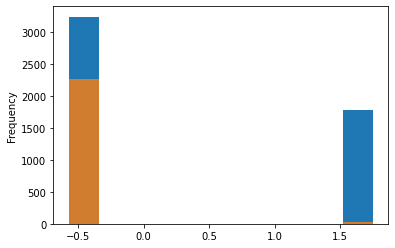

In [9]:
# Let's plot a histogram of values in column 1 grouped by the label

df[df['0']==0]['1'].plot.hist(bins=10)
df[df['0']==1]['1'].plot.hist(bins=10, alpha=0.8)
plt.show()

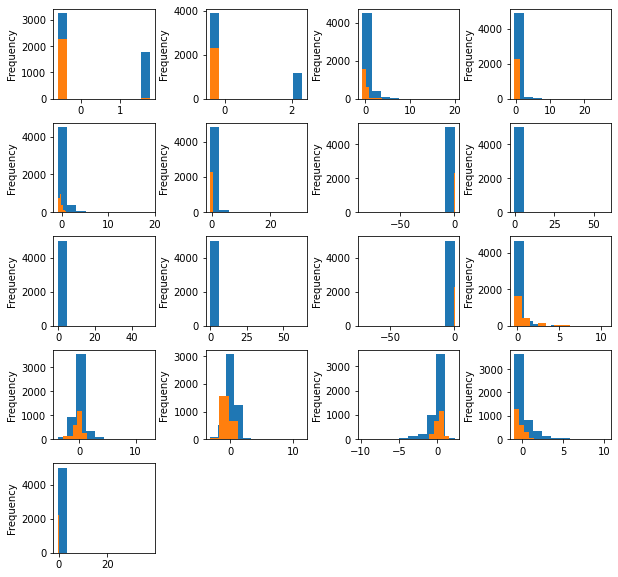

In [10]:
# It seems that feature 1 does not help to separate data according to labels.
# Let's see the same for all the features

plt.subplots(figsize=(10, 10))
plt.subplots_adjust(hspace=0.27,wspace=0.5)
for i in range(X[0].size):
    plt.subplot(5,4,0+i+1)
    df[df['0']==0][str(i+1)].plot.hist(bins=10)
    df[df['0']==1][str(i+1)].plot.hist(bins=10)
plt.show()

In [11]:
# Let's repeat the 10-fold Cross-validation with new data X2
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)


0.8854735260478572

In [12]:
# Let's find the 10-fold cross-validation with only 2 last columns

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2[:,15:],y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.7387985617426536

In [13]:
# Improvement in accuracy
# Unfortunately, we don't know before hand the relevant feature.

# Sklearn to the rescue!

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Select k best features following a given measure. Fit that on whole data set and return only relevant columns 
X_new = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)

# Let's do now the 10-fold cross-validation again
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.8389927339597676

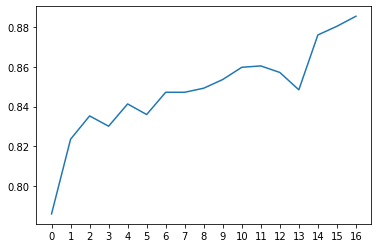

In [16]:
original = np.zeros(17)
for i in range(17):
    X_new = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2, y)
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='accuracy')  
    original[i]=np.mean(cv_scores)

plt.xticks(np.arange(0, 17, step=1))
plt.plot(range(17),original)
plt.show()

## 3- Let's find best parameters

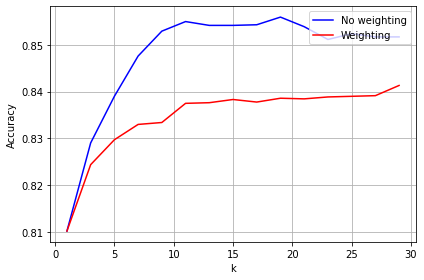

In [17]:
X_new = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_new, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 19, 'weights': 'uniform'} Accuracy= 0.8559386049501768


## What about PCA for dimensionality reduction?

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)

ValueError: array must not contain infs or NaNs

In [ ]:
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_pca, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

In [ ]:
# Not very good because does not consider labels in the reduction. Let's try LDA that is similar to PCA
# but takes into account labels

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X2, y).transform(X2)

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_lda, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)